In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import calendar
from matplotlib.text import Text
from math import sin, cos, sqrt, atan2, radians,asin
import folium
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
from matplotlib.legend_handler import HandlerBase
from folium.plugins import TimestampedGeoJson
from folium.plugins import MarkerCluster
from geopy.distance import great_circle
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
import folium
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
from geopy.distance import geodesic

In [3]:
train=pd.read_csv("./BlackFriday.csv")
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
#Insights on NaN values
train.isnull().sum()

User_ID                       0     
Product_ID                    0     
Gender                        0     
Age                           0     
Occupation                    0     
City_Category                 0     
Stay_In_Current_City_Years    0     
Marital_Status                0     
Product_Category_1            0     
Product_Category_2            166986
Product_Category_3            373299
Purchase                      0     
dtype: int64

## Replace Nan with 0

In [6]:
train.fillna(0)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


### Check for Missing Values 

In [7]:
train[pd.isnull(train)].sum()

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

### Exploratory Data Analysis

** Distribution of Amount**

Text(0.5, 1.0, 'Distribution of amount')

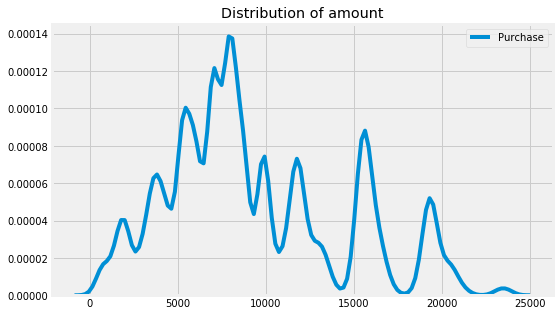

In [8]:
plt.figure(figsize=(8,5))
sns.kdeplot(train['Purchase']).set_title("Distribution of amount")

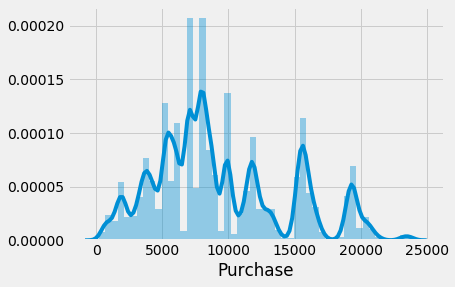

In [38]:
# 'Purchase' is the variable that we need to predict, so let's do some analysis on it.
# let's take a look at the distribution of it
sns.distplot(train['Purchase'])

In [9]:
train.loc[train['Product_Category_2']<0].shape

(0, 12)

In [10]:
train.loc[train['Product_Category_1']<0].shape

(0, 12)

In [11]:
train=train.loc[train['Purchase']>=0]
train.shape

(537577, 12)

In [12]:
print("Range of Purchase is ", (min(train['Purchase']),max(train['Purchase'])))

Range of Purchase is  (185, 23961)


In [13]:
#Let us check the values counts on product category trend
train["Product_Category_1"].value_counts()

5     148592
1     138353
8     112132
11    23960 
2     23499 
6     20164 
3     19849 
4     11567 
16    9697  
15    6203  
13    5440  
10    5032  
12    3875  
7     3668  
18    3075  
14    1500  
17    567   
9     404   
Name: Product_Category_1, dtype: int64

In [14]:
train["Product_Category_2"].value_counts()

8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0     5591 
12.0    5419 
10.0    2991 
3.0     2835 
18.0    2730 
7.0     615  
Name: Product_Category_2, dtype: int64

In [16]:
#Let us create a function to plot this
def count_plot(dataframe, column_name, title =None, hue = None):
    '''
    Function to plot seaborn count plot
    Input: Dataframe name that has to be plotted, column_name that has to be plotted, title for the graph
    Output: Plot the data as a count plot
    '''
    base_color = sns.color_palette()[0]
    sns.countplot(data = dataframe, x = column_name, hue=hue)
    plt.title(title)
    pass

In [17]:
#let us create an quick & simple bar plot based on pandos plot method
def simple_bar_plot(data, title = None):
    '''
    A simple bar plot based on pandas plot method
    Input: data to be plotted and title for the plot
    Output: the plotled graph
    '''
    data.plot("bar", title = title)
    pass

In [18]:
#Let us create class handler to get the legend displayed in the plot
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        '''
        Function to display legend for a plot
        Input: legend, tuple string, placement of x and y descent, width and hight, font for the legend
        Output: retuns the text for legend        
        '''
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

In [19]:

#top 10 poducts sold
train["Product_ID"].value_counts(sort=True)[:10]

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00145042    1384
P00059442    1384
Name: Product_ID, dtype: int64

### Plot Heatmap of above average scores

**Heatmap based on amount across dataset**

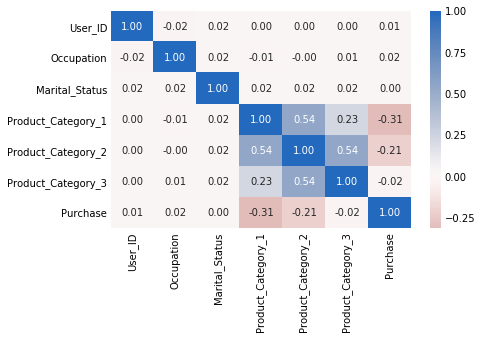

In [20]:
sns.heatmap(train.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

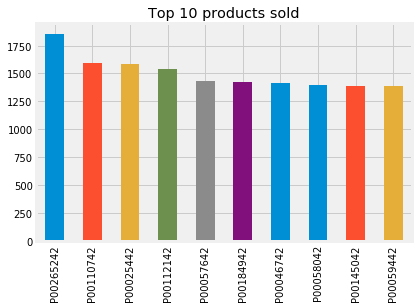

In [22]:
#plotting the top 1- products sold
simple_bar_plot(train["Product_ID"].value_counts(sort=True)[:10], title = "Top 10 products sold")

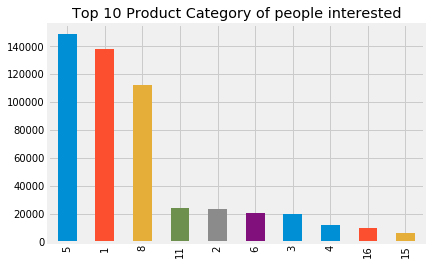

In [24]:
#plotting the product category
simple_bar_plot(train["Product_Category_1"].value_counts(sort=True)[:10], 
                title = "Top 10 Product Category of people interested")

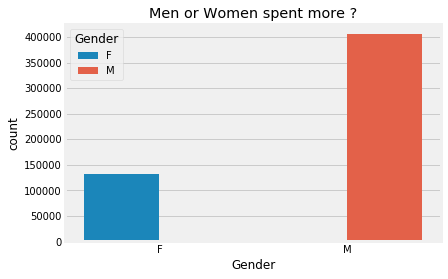

In [25]:
#Check who purchase more
count_plot(train,"Gender","Men or Women spent more ?","Gender")

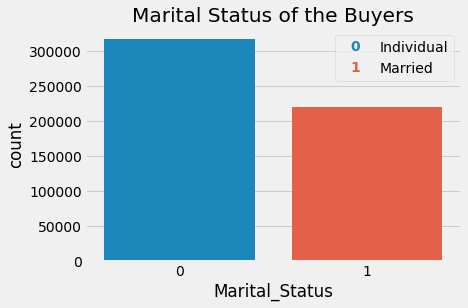

In [31]:
ax=sns.countplot(train.Marital_Status) 
#creating the mapping text for the values
handltext = ["0", "1"]
labels = ["Individual", "Married"]
#get the X axis tick labels
t = ax.get_xticklabels()
#map the x values as key and values
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
plt.title("Marital Status of the Buyers")
plt.show()

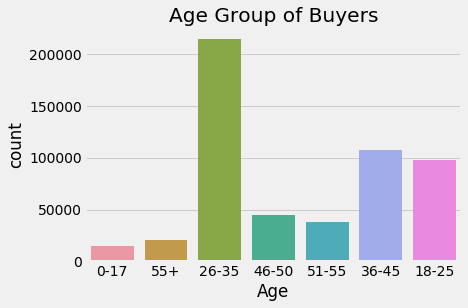

In [32]:
#sns.countplot(df['Age'])
count_plot(train,"Age","Age Group of Buyers")

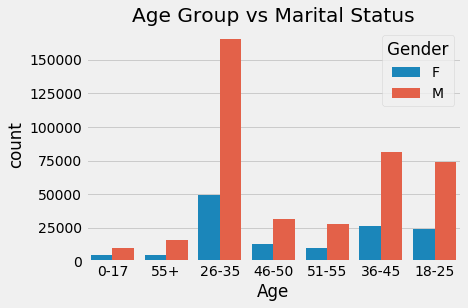

In [33]:
count_plot(train,"Age","Age Group vs Marital Status", "Gender")

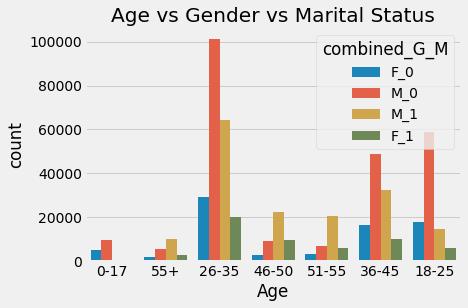

In [35]:
train['combined_G_M'] = train.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
#The above line results in the classes F_0 (unmarried females) M_0 (Unmarried males) 
#and F_1 M_1 (married females and males)
count_plot(train,"Age","Age vs Gender vs Marital Status", "combined_G_M")

In [39]:
# Let's look at the correlations between target and all the other variables
corr = train.corr()['Purchase'].sort_values()

print('Most Positive Correlations:\n', corr.tail(15))
print('\nMost Negative Correlations:\n', corr.head(15))

Most Positive Correlations:
 Product_Category_1   -0.314125
Product_Category_2   -0.209973
Product_Category_3   -0.022257
Marital_Status        0.000129
User_ID               0.005389
Occupation            0.021104
Purchase              1.000000
Name: Purchase, dtype: float64

Most Negative Correlations:
 Product_Category_1   -0.314125
Product_Category_2   -0.209973
Product_Category_3   -0.022257
Marital_Status        0.000129
User_ID               0.005389
Occupation            0.021104
Purchase              1.000000
Name: Purchase, dtype: float64
